## Observations and Insights 

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from numpy import array
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_dataset = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

combined_dataset['Tumor Volume (mm3)'] = round(combined_dataset['Tumor Volume (mm3)'],2)

# Display the data table for preview
combined_dataset.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,b128,5,45.65,0,Capomulin,Female,9,22
2,b128,10,43.27,0,Capomulin,Female,9,22
3,b128,15,43.78,0,Capomulin,Female,9,22
4,b128,20,42.73,0,Capomulin,Female,9,22


In [253]:
# Checking the number of mice.
df=pd.DataFrame(combined_dataset)

Total_Mice = df['Mouse ID'].nunique()
Total_Mice


249

In [254]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Boolean = df.duplicated(subset=['Mouse ID','Timepoint'])
Dup_Mouse_ID=[]
Dup_Mouse_ID=df[Duplicate_Boolean]['Mouse ID']
Dup=Dup_Mouse_ID[861]
Dup


'g989'

In [255]:
# Optional: Get all the data for the duplicate mouse ID. 

Dup_rows_df = df[df['Mouse ID'] == Dup] 
Dup_rows_df 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.00,0,Propriva,Female,21,26
861,g989,0,45.00,0,Propriva,Female,21,26
862,g989,5,48.79,0,Propriva,Female,21,26
863,g989,5,47.57,0,Propriva,Female,21,26
864,g989,10,51.75,0,Propriva,Female,21,26
865,g989,10,49.88,0,Propriva,Female,21,26
866,g989,15,51.33,1,Propriva,Female,21,26
867,g989,15,53.44,0,Propriva,Female,21,26
868,g989,20,55.33,1,Propriva,Female,21,26
869,g989,20,54.66,1,Propriva,Female,21,26


In [256]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Updated_df=pd.DataFrame(combined_dataset)
Updated_df=Updated_df.drop([860,861,862,863,864,865,866,867,868,869,870,871,872], axis=0)
Updated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,b128,5,45.65,0,Capomulin,Female,9,22
2,b128,10,43.27,0,Capomulin,Female,9,22
3,b128,15,43.78,0,Capomulin,Female,9,22
4,b128,20,42.73,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.12,1,Capomulin,Male,22,17
1889,m601,30,31.76,1,Capomulin,Male,22,17
1890,m601,35,30.83,1,Capomulin,Male,22,17
1891,m601,40,31.38,1,Capomulin,Male,22,17


In [257]:
# Checking the number of mice in the clean DataFrame.
New_Total_Mice = Updated_df['Mouse ID'].nunique()
New_Total_Mice

248

## Summary Statistics

In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Regimen_group = Updated_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Regimen_Mean = Regimen_group.mean()
Regimen_Mean = Regimen_Mean['Tumor Volume (mm3)']

Regimen_Median = Regimen_group.median()
Regimen_Median = Regimen_Median['Tumor Volume (mm3)']

Regimen_std = Regimen_group.std()
Regimen_std = Regimen_std['Tumor Volume (mm3)']


Regimen_var = Regimen_group.var()
Regimen_var = Regimen_var['Tumor Volume (mm3)']

Regimen_sem = Updated_df.groupby('Drug Regimen').agg(['mean','sem'])
Regimen_SEM = Regimen_sem['Tumor Volume (mm3)']['sem']

# Assemble the resulting series into a single summary dataframe.
Summary_Statistics_Dict = {'Mean Tumor Volume':Regimen_Mean, 'Median Tumor Volume':Regimen_Median, 'Tumor Volume Variance': Regimen_var, 'Tumor Volume Std. Dev.': Regimen_std, 'Tumor Volume Std. Err.': Regimen_SEM}
Summary_Statistics_DF = pd.DataFrame(Summary_Statistics_Dict)
Summary_Statistics_DF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675652,41.555,24.946279,4.994625,0.329336
Ceftamin,52.591011,51.775,39.288197,6.268030,0.469809
Infubinol,52.884663,51.820,43.130778,6.567403,0.492248
Ketapril,55.235745,53.700,68.555078,8.279799,0.603866
Naftisol,54.331720,52.505,66.173728,8.134724,0.596467
Placebo,54.033591,52.290,61.166371,7.820893,0.581322
Propriva,52.320743,50.445,43.850603,6.621979,0.544323
Ramicane,40.216974,40.675,23.487770,4.846418,0.320962
Stelasyn,54.233039,52.430,59.450545,7.710418,0.573111


In [259]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Summary_Statistics_AGG_DF = Updated_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})
Summary_Statistics_AGG_DF

Tumor Volume (mm3)                                       
                           mean  median       std        var       sem
Drug Regimen                                                          
Capomulin             40.675652  41.555  4.994625  24.946279  0.329336
Ceftamin              52.591011  51.775  6.268030  39.288197  0.469809
Infubinol             52.884663  51.820  6.567403  43.130778  0.492248
Ketapril              55.235745  53.700  8.279799  68.555078  0.603866
Naftisol              54.331720  52.505  8.134724  66.173728  0.596467
Placebo               54.033591  52.290  7.820893  61.166371  0.581322
Propriva              52.320743  50.445  6.621979  43.850603  0.544323
Ramicane              40.216974  40.675  4.846418  23.487770  0.320962
Stelasyn              54.233039  52.430  7.710418  59.450545  0.573111
Zoniferol             53.236209  51.820  6.966464  48.531626  0.516389

## Bar and Pie Charts

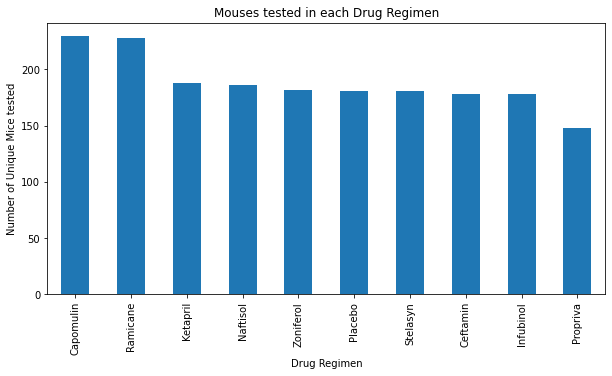

<Figure size 432x288 with 0 Axes>

In [370]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Count=Regimen_group['Mouse ID'].count().sort_values(ascending = False)
Mouse_Count_df=pd.DataFrame(Count)
Mouse_Count_df.plot(kind="bar", figsize=(10,5), legend=False)
plt.title("Mouses tested in each Drug Regimen")
plt.ylabel("Number of Unique Mice tested")
plt.show()
plt.tight_layout()


Text(0.5, 1.0, 'Mouses tested in each Drug Regimen')

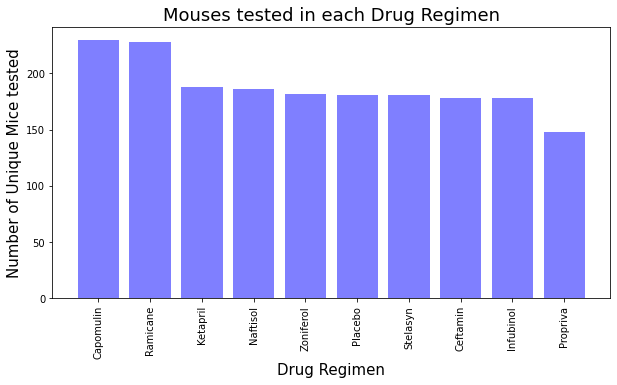

In [367]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#x_axis = np.arange(len(Mouse_Count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, Mouse_Count_df['Mouse ID'], color=['b'], alpha=0.5, align="center")
plt.xticks(tick_locations,Mouse_Count_df.index.values,  rotation="vertical")
plt.xlabel("Drug Regimen", size=15)
plt.ylabel("Number of Unique Mice tested", size=15)
plt.title("Mouses tested in each Drug Regimen", size=18)

Sex
Male      958
Female    922
Name: Sex, dtype: int64

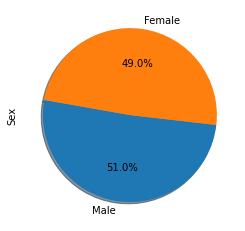

In [423]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Mice = Updated_df['Sex'].unique()

Gender_AGG_DF = Updated_df.groupby('Sex').agg({"Sex":'count'})
Gender_AGG_DF=Gender_AGG_DF["Sex"].sort_values(ascending = False)

Gender_AGG_DF.plot(kind='pie', y='Sex', shadow = True, startangle=170, autopct='%1.1f%%', legend = False)

Gender_AGG_DF

Text(0.0, 1.0, 'Sex')

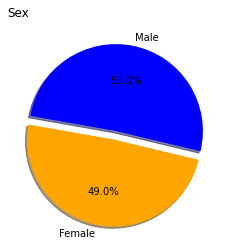

In [421]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = Gender_AGG_DF["Sex"]

# The colors of each section of the pie chart
#colors = ["orange", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("Sex", loc='left')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
